In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('d_tweets.csv')

In [6]:
df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'timezone', 'place',
       'tweet', 'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [7]:
df['username'].value_counts()

username
depressingmsgs     1000
Depressed2102       800
suicidalconcept     700
sosadtoday          700
Depressed1278       173
Abby_0921           123
Name: count, dtype: int64

In [8]:
df2 = pd.read_csv('non_d_tweets.csv')

In [9]:
len(df2['username'].value_counts())

3

In [10]:
df['tweet']

0       the real reason why you're sad? you're attache...
1           my biggest problem is overthinking everything
2       the worst sadness is the sadness you've taught...
3       i cannot make you understand. i cannot make an...
4       i don't think anyone really understands how ti...
                              ...                        
3491                          Cough sneezes are tho worst
3492                        I can be your sad whore ahaha
3493         Bro that feeling you get after you sneeze😍🥵🥴
3494                             Long pisses are the best
3495                            Dwight you ignorant slut.
Name: tweet, Length: 3496, dtype: object

In [11]:
df = df['tweet']
df2 = df2['tweet']
df = pd.DataFrame({'label' : [1 for i in range(len(df))], 'text': df.values})
df2 = pd.DataFrame({'label' : [0 for i in range(len(df2))], 'text': df2.values})
df

,label,text
0,1,the real reason why you're sad? you're attache...
1,1,my biggest problem is overthinking everything
2,1,the worst sadness is the sadness you've taught...
3,1,i cannot make you understand. i cannot make an...
4,1,i don't think anyone really understands how ti...
...,...,...
3491,1,Cough sneezes are tho worst
3492,1,I can be your sad whore ahaha
3493,1,Bro that feeling you get after you sneeze😍🥵🥴
3494,1,Long pisses are the best


In [12]:
df = pd.concat([df,df2])

In [13]:
df

,label,text
0,1,the real reason why you're sad? you're attache...
1,1,my biggest problem is overthinking everything
2,1,the worst sadness is the sadness you've taught...
3,1,i cannot make you understand. i cannot make an...
4,1,i don't think anyone really understands how ti...
...,...,...
2363,0,Let us now unite and work together for the gre...
2364,0,For months it has been all about the candidate...
2365,0,Leaders give us the chance to try and fail the...
2366,0,"""Never have so many millions of dollars been s..."


In [14]:
import re
import nltk
import numpy as np
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download(['wordnet', 'stopwords', 'punkt'])

stop=set(stopwords.words('english'))
filter = set(['iyanlavanzant', 'fixmylife', 'iyanla', 'http'])
l = WordNetLemmatizer()
def process(text):
  text=re.sub(r'\s+',' ',text, flags=re.I)
  #remove spl characters other than A-Z,a-z,0-9 or _
  text=re.sub(r'\W',' ',text)

  #remove single character
  text=re.sub(r'\s+[a-zA-Z]\s+',' ',text)

  #remove character not alphabetical
  text=re.sub(r'[^a-zA-Z\s]','',text)

  text=text.lower()

  words= word_tokenize(text)

  words=[l.lemmatize(i) for i in words]
  Words=[word for word in words if word not in stop and word not in filter]


  Words=[word for word in Words if len(word)>2]

  #removing duplicate words
  indices = np.unique(Words, return_index=True)[1]
  cleaned_text = np.array(Words)[np.sort(indices)].tolist()

  return cleaned_text

df['text'] = [process(i) for i in df['text']]
x = df['text']
y = df['label']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .2, random_state=42)

import tensorflow as tf
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
max_vocab = 20000
t = Tokenizer(num_words=max_vocab)
t.fit_on_texts(x_train)
word_idx = t.word_index
v = len(word_idx)
print('vocab size', v)
x_train = t.texts_to_sequences(x_train)
x_test = t.texts_to_sequences(x_test)

maxlen = 100
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)
x_train

x_test

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


vocab size 6406


array([[   0,    0,    0, ...,   50,  101,  999],
       [   0,    0,    0, ...,    0,  125,   88],
       [   0,    0,    0, ...,   18,   55,  980],
       ...,
       [   0,    0,    0, ...,  677,  347,   36],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ..., 2036,  140,  149]], dtype=int32)

In [15]:
df['text']

0       [real, reason, attached, people, distant, payi...
1            [biggest, problem, overthinking, everything]
2                          [worst, sadness, taught, hide]
3       [make, understand, anyone, happening, inside, ...
4       [think, anyone, really, understands, tiring, o...
                              ...                        
2363               [unite, work, together, greater, good]
2364                      [month, candidate, today, vote]
2365       [leader, give, chance, fail, another, succeed]
2366    [never, many, million, dollar, spent, move, vo...
2367    [must, remain, steadfast, going, flexible, dif...
Name: text, Length: 5864, dtype: object

<ipython-input-16-8a67da7e1369>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = graph['Word'], x= graph['Frequency'], palette= 'summer')


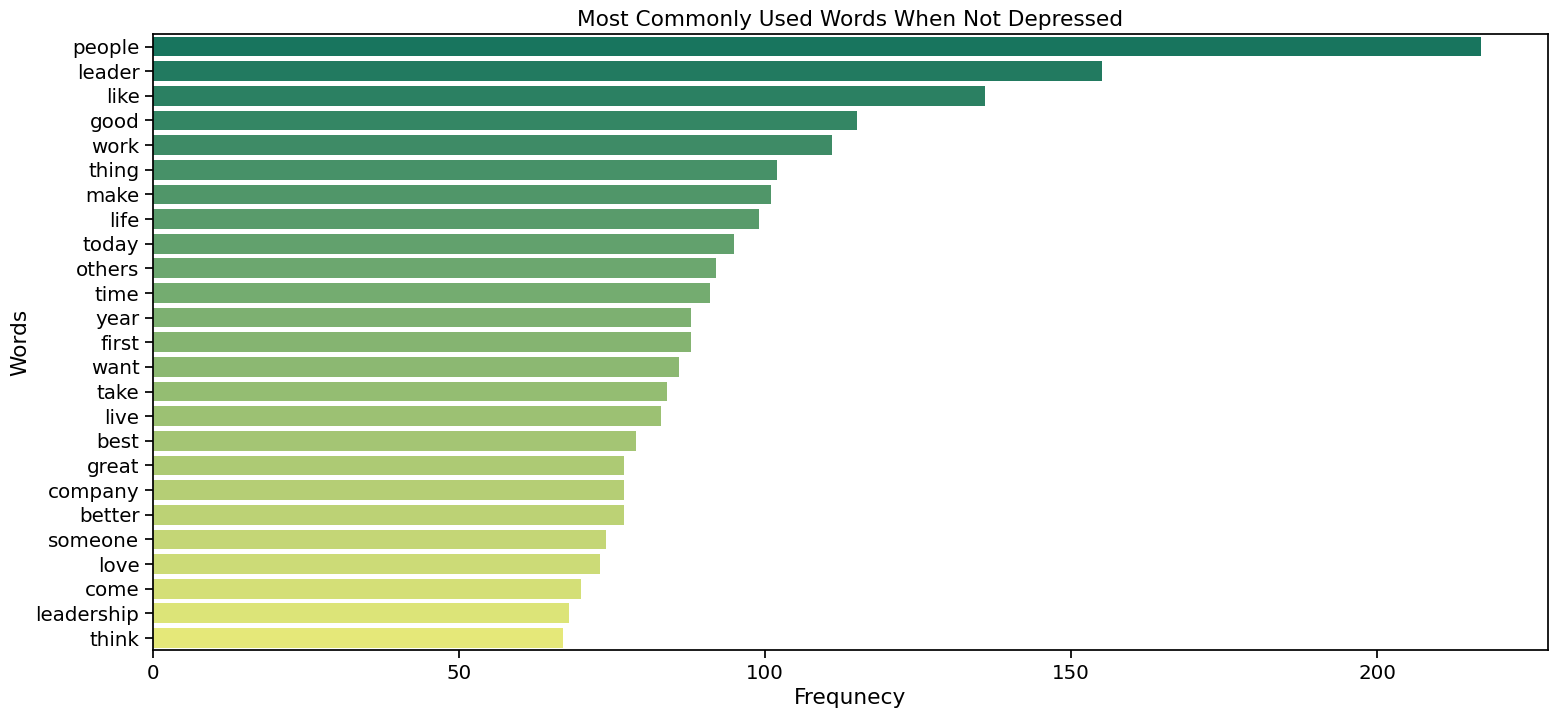

In [16]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

all_words = []
for sentence in df[df['label'] == 0]['text'].to_list():
    for word in sentence:
        all_words.append(word)

graph = pd.DataFrame(Counter(all_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = graph['Word'], x= graph['Frequency'], palette= 'summer')
plt.title("Most Commonly Used Words When Not Depressed")
plt.xlabel("Frequnecy")
plt.ylabel("Words")
plt.show()

<ipython-input-17-aaa11233c311>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = graph['Word'], x= graph['Frequency'], palette= 'flare')


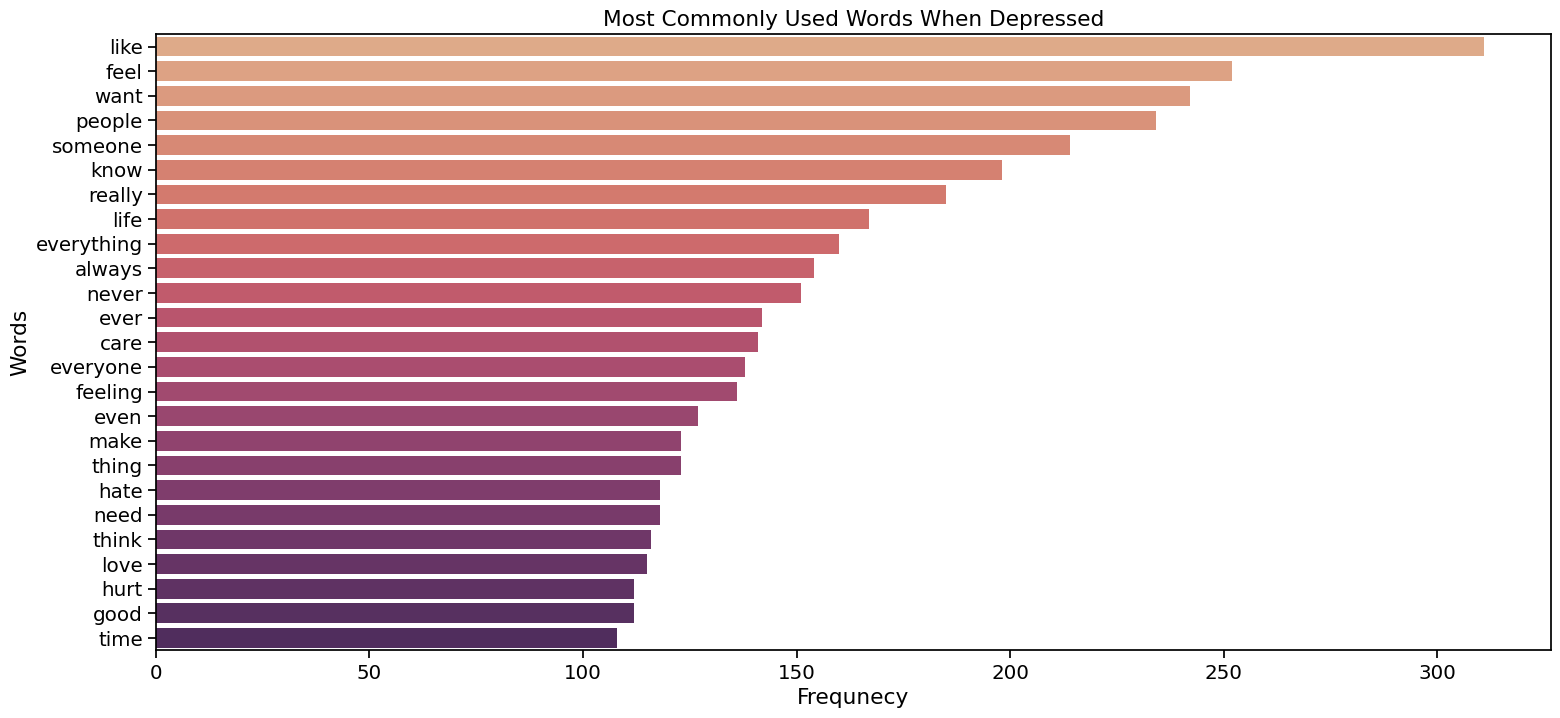

In [17]:
all_words = []
for sentence in df[df['label'] == 1]['text'].to_list():
    for word in sentence:
        all_words.append(word)

graph = pd.DataFrame(Counter(all_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = graph['Word'], x= graph['Frequency'], palette= 'flare')
plt.title("Most Commonly Used Words When Depressed")
plt.xlabel("Frequnecy")
plt.ylabel("Words")
plt.show()

In [19]:
!pip install scikit-plot

In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scikitplot.metrics import plot_confusion_matrix, plot_roc

def train_model(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_prob = model.predict_proba(x_test)
    accuracy = round(accuracy_score(y_test, y_pred), 3)
    precision = round(precision_score(y_test, y_pred), 3)
    recall = round(recall_score(y_test, y_pred), 3)

    print(f'Accuracy of the model: {accuracy}')
    print(f'Precision Score of the model: {precision}')
    print(f'Recall Score of the model: {recall}')

    sns.set_context('notebook', font_scale= 1.3)
    fig, ax = plt.subplots(1, 2, figsize = (25,  8))
    ax1 = plot_confusion_matrix(y_test, y_pred, ax= ax[0], cmap= 'YlGnBu')
    ax2 = plot_roc(y_test, y_prob, ax= ax[1], plot_macro= False, plot_micro= False, cmap= 'summer')
    return model

In [ ]:
nb = MultinomialNB()
nb = train_model(nb)

Accuracy of the model: 0.741
Precision Score of the model: 0.719
Recall Score of the model: 0.922


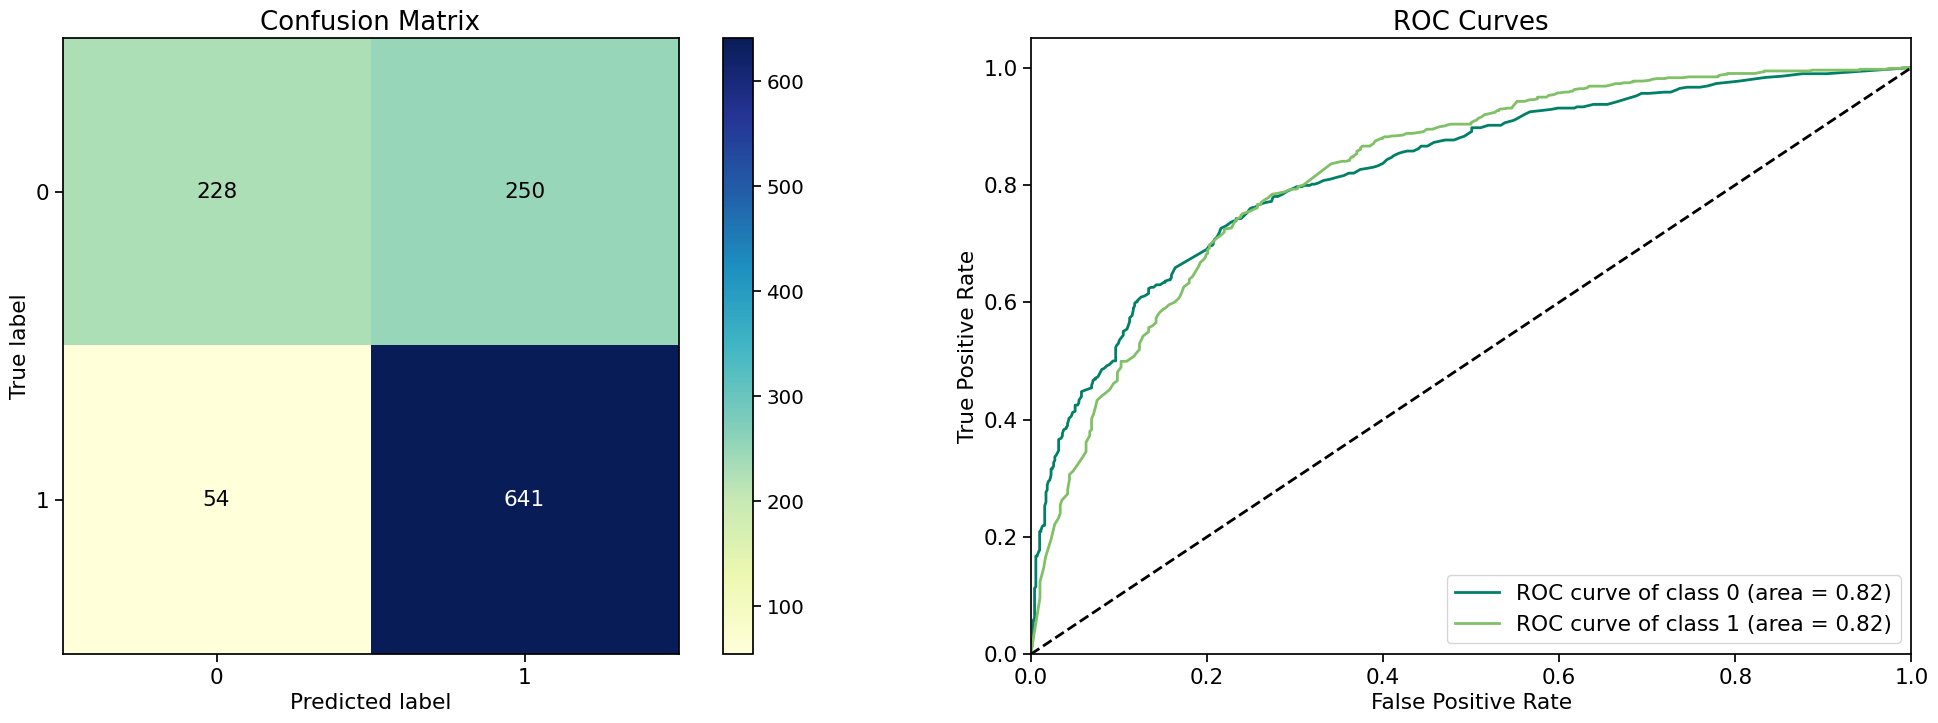

In [21]:
rf = RandomForestClassifier(n_estimators= 300)
rf = train_model(rf)

In [ ]:
sv = SVC(probability=True)
sv = train_model(sv)

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=300)
xgb = train_model(xgb)

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
hgb = HistGradientBoostingClassifier(max_iter=300)
train_model(hgb)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=300)
train_model(gb)

In [31]:
tad = [process("my name is lokesh reddy penugonda")]
tad = t.texts_to_sequences(tad)
maxlen = 100
tad = pad_sequences(tad, maxlen=maxlen)
prediction = rf.predict_proba(tad)
print(prediction, tad)
if prediction[0][1] > .5:
  print('youre depressed with', round(prediction[0][1]*100, 3), ' % confidence')

[[0.55666667 0.44333333]] [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0 412]]
